## <center>Automatic Feature Selection</center>

- to reduce dimentionality
- common methods: univariate statistics, model-based selection, iterative selection

### 1. Unvariate Statistics
- determines the relationship between each feature and output (target)
- only the features with the highest confidence are selected
- <b>SelectKBest</b> - selecting K number of features
- <b>SelectPercentile</b> - selection is made based on a percentage of the original features

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
%matplotlib inline

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise  = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is:{}'.format(X_train.shape))
print('X_train_selected.shape is :{}'.format(X_train_selected.shape))

X_train.shape is:(284, 80)
X_train_selected.shape is :(284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


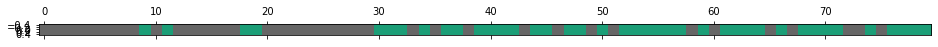

In [11]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='Dark2')

In [18]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('score of all features: {:.3f}'.format(logreg.score(X_test, y_test)))

logreg.fit(X_test_selected, y_test)
print('score of selected features: {:.3f}'.format(logreg.score(X_test_selected, y_test)))

score of all features: 0.919
score of selected features: 0.958


C:\Users\RAHUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\RAHUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

### 2. Model Based Feature Selection
- uses a supervised model to determine the importance of eachh feature 
- keeps the most important features
- needs a measure for the importance of features (DT and RF have the 'feature_importances' attribute)

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selectmodel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')


In [23]:
selectmodel.fit(X_train, y_train)
X_train_s = selectmodel.transform(X_train)
print('The shape of X_train is : ', X_train.shape)
print('The shape of X_train_s is : ', X_train_s.shape)

The shape of X_train is :  (284, 80)
The shape of X_train_s is :  (284, 40)


Text(0.5, 0, 'Index of features')

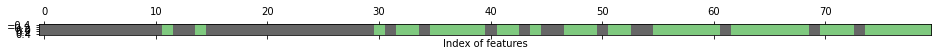

In [25]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='Accent')
plt.xlabel('Index of features')

In [28]:
X_test_s = selectmodel.transform(X_test)
score = LogisticRegression().fit(X_train_s, y_train).score(X_test_s, y_test)
print('score of logiistic feature selection : {:.3f}'.format(score))

score of logiistic feature selection : 0.930


C:\Users\RAHUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
